In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(400)

In [3]:
rating_df = pd.read_csv('data/raw/rating_complete.csv')

In [4]:
anime_df = pd.read_csv('data/raw/anime.csv')

In [5]:
# remove duplicate rows in the dataframes
rating_df.drop_duplicates(inplace=True)
anime_df.drop_duplicates(subset='id', inplace=True)

In [6]:
rating_df.rename(columns={'rating' : 'score'}, inplace=True)

In [7]:
rating_df.head()

,user_id,anime_id,score
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9


In [8]:
anime_df.head()

,id,title,media_type,mean,num_scoring_users,status,num_episodes,start_date,end_date,source,...,studios,synopsis,nsfw,created_at,updated_at,main_picture_medium,main_picture_large,alternative_titles_en,alternative_titles_ja,alternative_titles_synonyms
0,5114,Fullmetal Alchemist: Brotherhood,tv,9.14,1848530,finished_airing,64.0,2009-04-05 00:00:00,2010-07-04 00:00:00,manga,...,['Bones'],After a horrific alchemy experiment goes wrong...,white,2008-08-21 03:35:22,2022-04-18 05:06:13,https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,['Hagane no Renkinjutsushi: Fullmetal Alchemis...
1,11061,Hunter x Hunter (2011),tv,9.05,1491056,finished_airing,148.0,2011-10-02 00:00:00,2014-09-24 00:00:00,manga,...,"['Madhouse', 'Studio Live']",Hunters devote themselves to accomplishing haz...,white,2011-07-27 08:41:39,2022-04-18 05:11:21,https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,['HxH (2011)']
2,9253,Steins;Gate,tv,9.08,1241454,finished_airing,24.0,2011-04-06 00:00:00,2011-09-14 00:00:00,visual_novel,...,['White Fox'],Eccentric scientist Rintarou Okabe has a never...,white,2010-07-26 09:23:40,2022-05-01 21:24:42,https://api-cdn.myanimelist.net/images/anime/5...,https://api-cdn.myanimelist.net/images/anime/5...,Steins;Gate,STEINS;GATE,[]
3,21,One Piece,tv,8.65,1079359,currently_airing,NaN,1999-10-20 00:00:00,NaN,manga,...,['Toei Animation'],"Gol D. Roger was known as the ""Pirate King,"" t...",white,2005-11-11 01:20:50,2022-04-18 05:12:08,https://api-cdn.myanimelist.net/images/anime/6...,https://api-cdn.myanimelist.net/images/anime/6...,One Piece,ONE PIECE,['OP']
4,1535,Death Note,tv,8.62,2429917,finished_airing,37.0,2006-10-04 00:00:00,2007-06-27 00:00:00,manga,...,['Madhouse'],"Brutal murders, petty thefts, and senseless vi...",white,2006-10-04 03:39:19,2022-04-18 04:59:29,https://api-cdn.myanimelist.net/images/anime/9...,https://api-cdn.myanimelist.net/images/anime/9...,Death Note,デスノート,['DN']


In [12]:
# desired number of unique users and anime in dataset
n_anime = 3000
n_users = 6000

# minimum number of ratings a user has to make
min_n_rating = 35 

In [13]:
user_rating_cnt = rating_df.user_id.value_counts()

In [14]:
# keep users with at least <min_n_rating> ratings
users_keep = user_rating_cnt[user_rating_cnt >= min_n_rating].index.tolist()

In [15]:
user_rating_cnt[users_keep[-1]]

35

In [16]:
# choose <n_user> random users to remain in dataset
users_keep = np.random.choice(users_keep, n_users, replace=False)

In [17]:
len(users_keep)

6000

In [18]:
# best_users = rating_df['user_id'].value_counts().index.tolist()[:max_n_users]

In [19]:
rating_df = rating_df[rating_df['user_id'].isin(users_keep)]

In [20]:
len(rating_df)

1377039

In [21]:
animes_with_rating = rating_df.anime_id.unique()

In [22]:
anime_to_pop = {}
for anime_id in animes_with_rating:
    popularity = anime_df[anime_df.id == anime_id].popularity
    
    if len(popularity) == 1:
        popularity = popularity.item()
        anime_to_pop[anime_id] = popularity

In [23]:
# get the ids of the <n_anime> most popularity anime 
anime_keep = sorted(anime_to_pop.keys(), key=lambda x : anime_to_pop[x])[:n_anime]

In [24]:
len(anime_keep)

3000

In [25]:
# remove reviews for unpopular anime
rating_df = rating_df[rating_df['anime_id'].isin(anime_keep)]

In [26]:
# review unpopular anime from anime dataset as well
anime_df = anime_df[anime_df.id.isin(anime_keep)]

In [27]:
len(anime_df)

3000

6000

<AxesSubplot:ylabel='Frequency'>

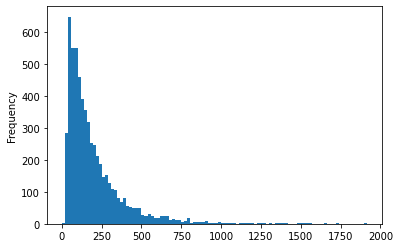

In [28]:
rating_df['user_id'].value_counts().plot.hist(bins=100)

In [30]:
# calculate sparcity of interaction matrix
n_anime = len(rating_df.anime_id.unique())
n_rating = len(rating_df)
n_users = len(rating_df.user_id.unique())
sparcity = 1 - (n_rating / (n_anime * n_users))

print(f'n_anime: {n_anime}, n_users: {n_users}, n_rating: {n_rating}, sparcity: {sparcity}')

n_anime: 3000, n_users: 6000, n_rating: 1207781, sparcity: 0.9329010555555556


In [32]:
# test_df = rating_df.copy(deep=True)

In [32]:
# reindex all the users so that ids run from 0 to <n_users> - 1
user_to_idx = {}

for idx, user_id in enumerate(users_keep):
    user_to_idx[user_id] = idx

rating_df['user_id'] = rating_df['user_id'].apply(lambda x:user_to_idx[x])

In [33]:
# index all anime so that ids run from 0 to <n_anime> - 1
anime_to_idx = {}

for idx, anime_id in enumerate(anime_keep):
    anime_to_idx[anime_id] = idx

rating_df['anime_id'] = rating_df['anime_id'].apply(lambda x:anime_to_idx[x])
anime_df['idx'] = anime_df['id'].apply(lambda x : anime_to_idx[x])

In [34]:
rating_df

,user_id,anime_id,score
3704,690,2999,7
3706,690,1946,7
3707,690,1037,7
3708,690,760,8
3709,690,949,9
...,...,...,...
57618674,5897,503,9
57618675,5897,26,8
57618676,5897,1224,8
57618677,5897,261,9


In [38]:
max(rating_df['anime_id'].unique())

2999

In [42]:
len(rating_df.anime_id.unique())

2977

In [31]:
rating_df.user_id.value_counts()

308285    1914
31547     1734
82737     1650
23184     1570
117915    1537
          ... 
350399      23
316292      12
159496       6
49372        4
323577       3
Name: user_id, Length: 6000, dtype: int64

In [35]:
# export the cleaned dataframes
rating_df.to_csv('data/processed/ratings.csv', index=False)

In [36]:
anime_df.to_csv('data/processed/animes.csv', index=False)